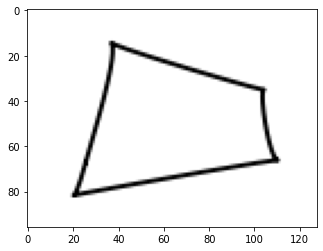

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "" #Path to the directory of your training data
CATEGORIES = ["low", "medium", "high"] #the three labels

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) #path to low, medium, or high directory
    for img in os.listdir(path):
        BGR_img = cv2.imread(os.path.join(path, img))
        RGB_img = cv2.cvtColor(BGR_img, cv2.COLOR_BGR2RGB) #Convert to RGB since default of cv2 is BGR
        img_array = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY) #Convert to Grayscale
        plt.imshow(img_array, cmap = "gray") #Show image to test if the previous lines worked
        plt.show()
        break
    break

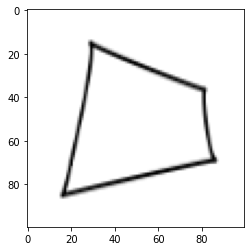

In [3]:
#Downsize the images to be 100x100 pixels

IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')

#Alternatively select different dimensons:
IMG_X = 96
IMG_Y = 128

In [4]:
training_data = []

#function to create the training data:
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) #path to low, medium, or high directory
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                BGR_img = cv2.imread(os.path.join(path, img))
                RGB_img = cv2.cvtColor(BGR_img, cv2.COLOR_BGR2RGB) #Convert to RGB since default of cv2 is BGR
                img_array = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY) #Convert to Grayscale
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                if class_num == 0:
                    training_data.append([new_array, (1,0,0)])
                elif class_num == 1:
                    training_data.append([new_array, (0,1,0)])
                else:
                    training_data.append([new_array, (0,0,1)])
                #training_data.append([img_array, class_num])
            except Exception as e:
                pass
            
            
create_training_data()

'training_data = []\n        \ndef create_training_data_shape():\n    for category in CATEGORIES:\n        path = os.path.join(DATADIR, category) #path to edgy or round dir\n        class_num = CATEGORIES.index(category)\n        for img in os.listdir(path):\n            try:\n                BGR_img = cv2.imread(os.path.join(path, img))\n                RGB_img = cv2.cvtColor(BGR_img, cv2.COLOR_BGR2RGB) #Convert to RGB since default of cv2 is BGR\n                img_array = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY) #Convert to Grayscale\n                #img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)\n                new_array = cv2.resize(img_array, (IMG_X, IMG_Y))\n                if class_num == 0:\n                    training_data.append([new_array, (1,0)])\n                elif class_num == 1:\n                    training_data.append([new_array, (0,1)])\n                #else:\n                    #training_data.append([new_array, (0.5,0.5)])\n          

In [5]:
print(len(training_data)) #check size of training data

12000


In [6]:
import random

random.shuffle(training_data) #shuffle the training data to prevent the network from learning based on the order of data

In [8]:
X = []  #actual values of the sample
Y = []  #labels

In [9]:
for features, label in training_data:
    X.append(features)
    Y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
#X = np.array(X).reshape(-1, 96, 128, 1) #Alternative with custom image dimensions

In [10]:
import pickle

#Save training data to be loaded later

pickle_out = open("XComplexity.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("YComplexity.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close()